In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
import pandas_datareader as pdr
import seaborn as sns
import statsmodels.tsa.stattools as st
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.api import acf, pacf, graphics
sns.mpl.rc('figure',figsize=(16, 6))

In [2]:
simreturn = pd.read_table(r'C:\Users\zoe_x\Documents\python\Tsay3 data\m-deciles08.txt', sep='\s+')  #sep='\s+'表示对数据进行规整

In [3]:
simreturn.head()

,date,CAP1RET,CAP2RET,CAP9RET,CAP10RET
0,19700130,0.054383,-0.004338,-0.073082,-0.076874
1,19700227,0.020264,0.020155,0.064185,0.059512
2,19700331,-0.031790,-0.028090,-0.004034,-0.001327
3,19700430,-0.184775,-0.193004,-0.115825,-0.091112
4,19700529,-0.088189,-0.085342,-0.085565,-0.053193


In [4]:
date = pd.to_datetime(simreturn['date'], format='%Y%m%d')  #转换成日期格式

In [5]:
simreturn.index=date

In [6]:
simreturn = simreturn.drop(['date'],axis=1)

In [7]:
simreturn.head()

,CAP1RET,CAP2RET,CAP9RET,CAP10RET
date,,,,
1970-01-30,0.054383,-0.004338,-0.073082,-0.076874
1970-02-27,0.020264,0.020155,0.064185,0.059512
1970-03-31,-0.031790,-0.028090,-0.004034,-0.001327
1970-04-30,-0.184775,-0.193004,-0.115825,-0.091112
1970-05-29,-0.088189,-0.085342,-0.085565,-0.053193


In [8]:
decile_2 = simreturn['CAP2RET']

In [9]:
decile_2.head()

date
1970-01-30   -0.004338
1970-02-27    0.020155
1970-03-31   -0.028090
1970-04-30   -0.193004
1970-05-29   -0.085342
Name: CAP2RET, dtype: float64

In [10]:
decile2=pd.DataFrame(decile_2)

In [11]:
decile2=decile2.asfreq('BM',fill_value='bfill')

In [12]:
decile2.head()

,CAP2RET
date,
1970-01-30,-0.004338
1970-02-27,0.020155
1970-03-31,-0.02809
1970-04-30,-0.193004
1970-05-29,-0.085342


In [13]:
decile_10 = simreturn['CAP10RET']

In [14]:
decile10=pd.DataFrame(decile_10)

In [15]:
decile10=decile10.asfreq('BM',fill_value='bfill')

In [16]:
decile10.head()

,CAP10RET
date,
1970-01-30,-0.076874
1970-02-27,0.059512
1970-03-31,-0.001327
1970-04-30,-0.091112
1970-05-29,-0.053193


# 问题(a),检验12阶滞后自相关系数是否在5%的显著性水平下为0

In [17]:
# 原假设：自相关系数1-12=0，备择假设：自相关系数1-12中存在不为0的

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [19]:
acorr_ljungbox(decile_2, [12,13]) #每个array中的前一个值分别为统计量和p值

(array([55.73633336, 55.95302062]), array([1.33502495e-07, 2.74728362e-07]))

In [20]:
acorr_ljungbox(decile_10, [12,13]) #每个array中的前一个值分别为统计量和p值

(array([10.68715429, 10.69592975]), array([0.55590269, 0.63627368]))

In [21]:
# 结论：根据LB检验的结果，对于decile_2拒绝原假设，认为自相关系数显著不为0；对于decile_10无法拒绝原假设，自相关系数不能显著区别于0。

# 问题(b),为decile_2构建ARMA模型，进行模型检测并写下拟合模型

In [22]:
import statsmodels.tsa.stattools as st

In [23]:
st.arma_order_select_ic(decile_2, max_ar=4, max_ma=2, ic='aic')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

{'aic':              0            1            2
 0 -1221.305074 -1240.933427 -1238.966820
 1 -1239.108125 -1238.955447 -1238.873764
 2 -1239.785366 -1239.777849 -1237.794268
 3 -1238.603777 -1237.793045 -1242.451680
 4 -1236.810144 -1235.817922          NaN, 'aic_min_order': (3, 2)}

In [24]:
# 使用ARMA（3，2）模型进行拟合

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model_decile2 = ARIMA(decile_2,order=(3,0,2)).fit(dsp=-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [27]:
model_decile2.summary() #拟合结果如下

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                CAP2RET   No. Observations:                  468
Model:                     ARMA(3, 2)   Log Likelihood                 628.226
Method:                       css-mle   S.D. of innovations              0.063
Date:                Wed, 01 Apr 2020   AIC                          -1242.452
Time:                        15:13:38   BIC                          -1213.412
Sample:                             0   HQIC                         -1231.025
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0106      0.003      3.271      0.001       0.004       0.017
ar.L1.CAP2RET     1.9089      0.059     32.097      0.000       1.792       2.025
ar.L2.CAP2RET    -1.2740      0.092    -13.801      0.000      -1.455      -1.093
ar.L3.CAP2RET     0.1706      0.051      3.377      0.001       0.072       0.270
ma.L1.CAP2RET    -1.7263      0.037    -46.362      0.000      -1.799      -1.653
ma.L2.CAP2RET     0.9422      0.035     26.594      0.000       0.873       1.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8942           -0.4822j            1.0159           -0.0787
AR.2            0.8942           +0.4822j            1.0159            0.0787
AR.3            5.6800           -0.0000j            5.6800           -0.0000
MA.1            0.9161           -0.4713j            1.0302           -0.0756
MA.2            0.9161           +0.4713j            1.0302            0.0756
-----------------------------------------------------------------------------
"""

In [28]:
resid2 = model_decile2.resid

In [29]:
resid2.head()

date
1970-01-30   -0.014938
1970-02-27    0.012663
1970-03-31   -0.040872
1970-04-30   -0.196029
1970-05-29   -0.054336
dtype: float64

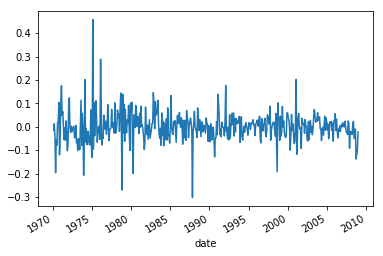

In [30]:
resid2.plot()

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

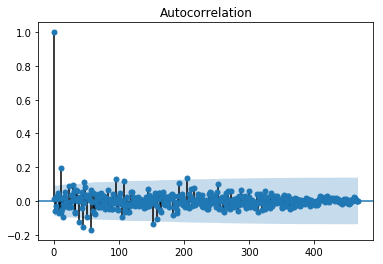

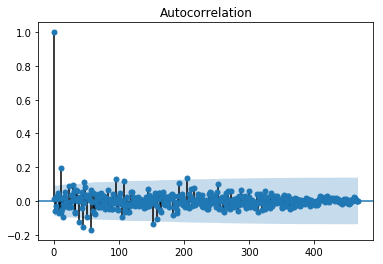

In [32]:
plot_acf(resid2)

In [33]:
acorr_ljungbox(resid2,model_decile2.)

SyntaxError: invalid syntax (<ipython-input-33-20506a546d2f>, line 1)

In [34]:
# 以上对模型进行检测，认为模型应当是充分的

# 使用ARMA（3，2）模型来进行1-12步预测，并求出相应的标准差

In [35]:
model_decile2.forecast(12) #预测结果中的三个array，前两个提供的分别就是需要的预测结果和相应的标准差

(array([ 0.0211236 ,  0.03086975,  0.0302881 ,  0.0241532 ,  0.01484599,
         0.00479642, -0.00357595, -0.0083421 , -0.0084878 , -0.00412194,
         0.0035846 ,  0.0127084 ]),
 array([0.06317127, 0.06421599, 0.06422468, 0.0642529 , 0.06432349,
        0.06440033, 0.06444844, 0.06446076, 0.06446117, 0.06448153,
        0.06453331, 0.06459883]),
 array([[-0.10268982,  0.14493702],
        [-0.09499128,  0.15673077],
        [-0.09558996,  0.15616615],
        [-0.10178017,  0.15008656],
        [-0.11122573,  0.14091772],
        [-0.1214259 ,  0.13101874],
        [-0.12989257,  0.12274067],
        [-0.13468286,  0.11799866],
        [-0.13482937,  0.11785377],
        [-0.13050342,  0.12225954],
        [-0.12289837,  0.13006757],
        [-0.11390298,  0.13931979]]))